# PCA

# 1)- Importing key Modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

C:\Users\Hassan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """


In [3]:
pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


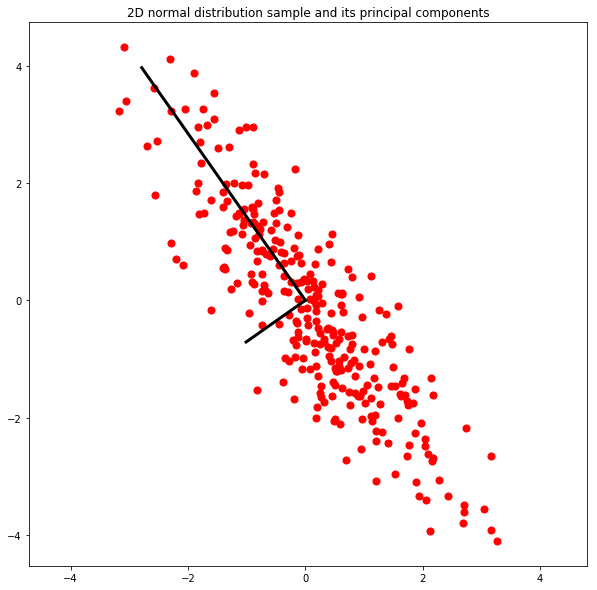

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

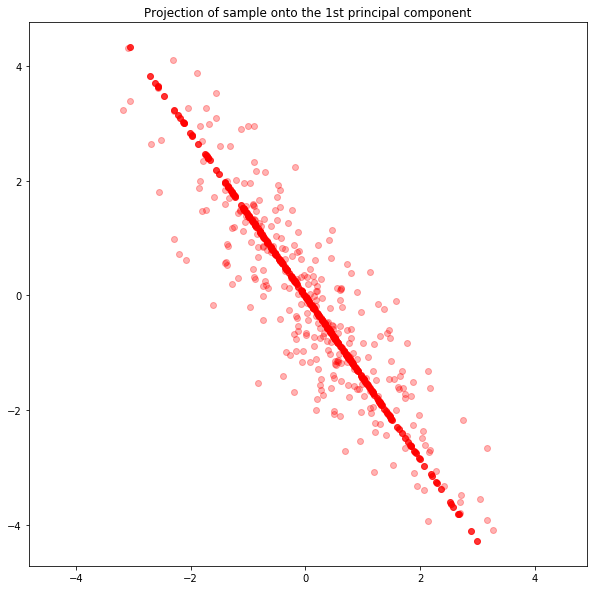

In [5]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

# 2)- Visualizing high-dimensional data

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


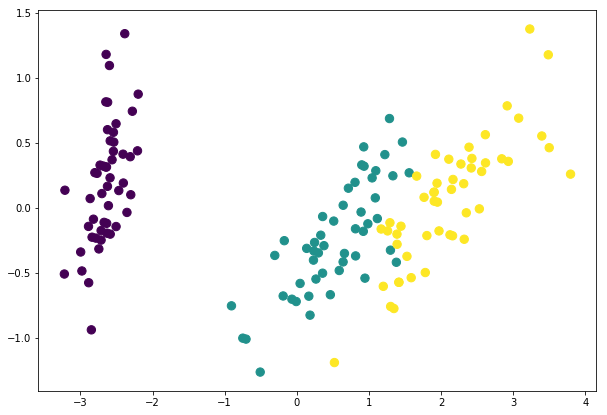

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

# 3)- Handwritten digits Dataset

Projecting 64-dimensional data to 2D


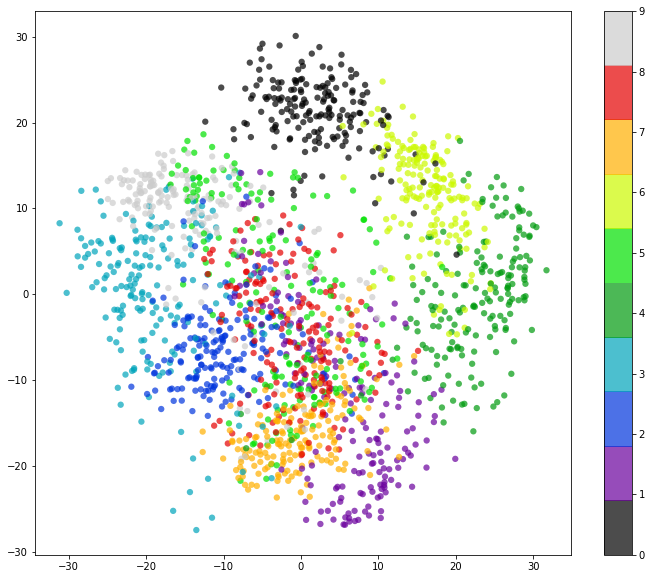

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

### 2 principal components

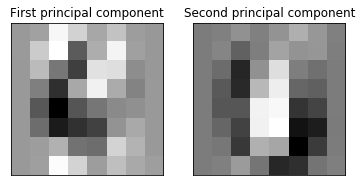

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Data compression

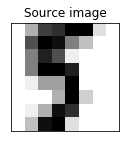

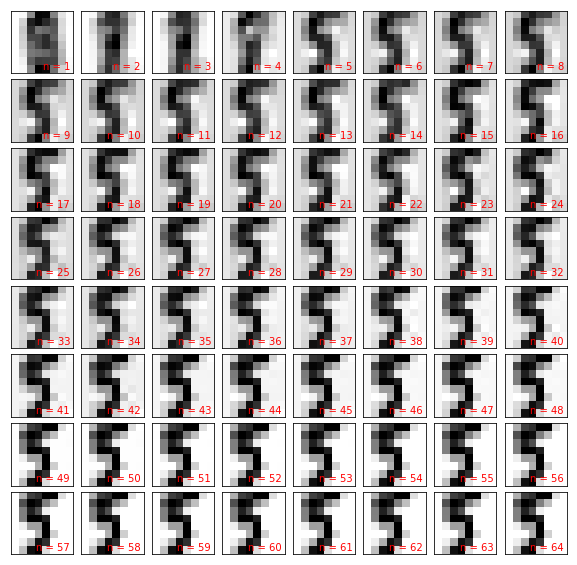

In [9]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

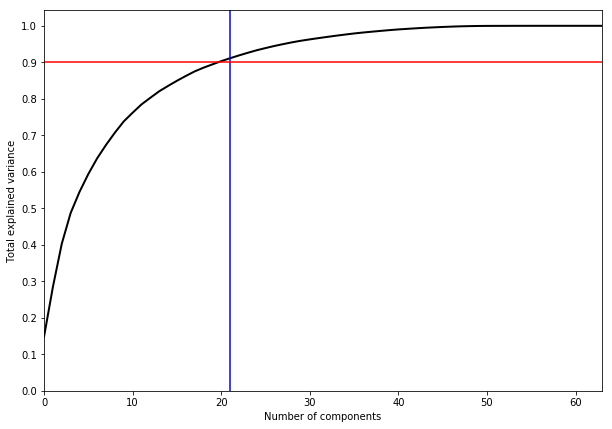

In [10]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [11]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


# 4)-PCA as preprocessing

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


In [13]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


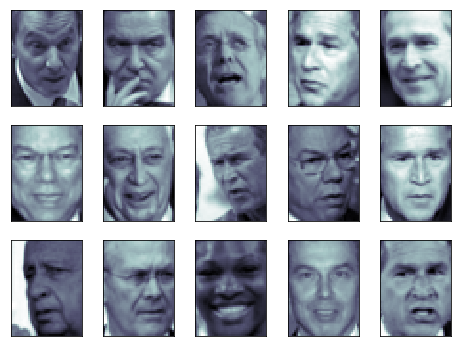

In [14]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


100 principal components explain 92.71% of variance


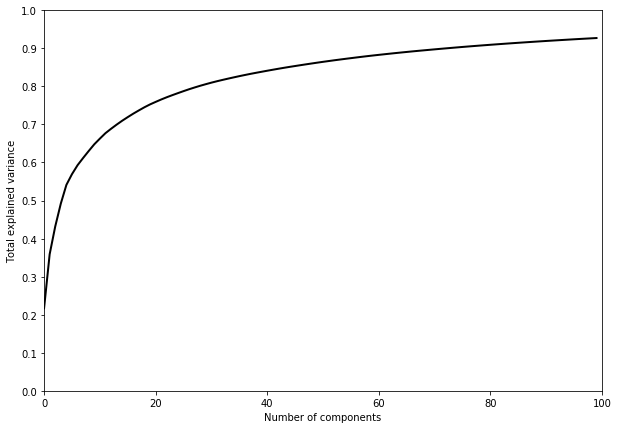

In [16]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

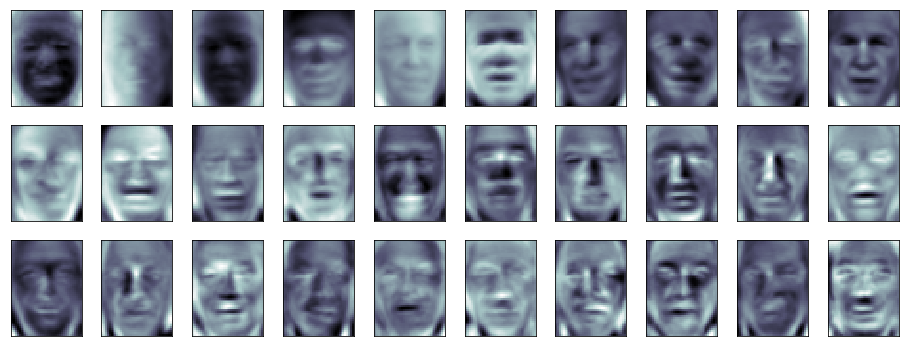

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

**Mean Face**

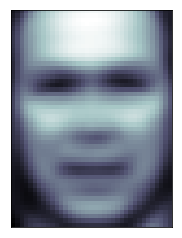

In [18]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

# 5)- Applying Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### With PCA

In [20]:
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=10000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

In [21]:
# Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

Accuracy: 0.717949
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.53      0.52        15
     Colin Powell       0.75      0.72      0.73        65
  Donald Rumsfeld       0.55      0.55      0.55        29
    George W Bush       0.83      0.82      0.83       133
Gerhard Schroeder       0.72      0.70      0.71        33
      Hugo Chavez       0.71      0.75      0.73        16
   Jacques Chirac       0.50      0.25      0.33        12
    Jean Chretien       0.44      0.40      0.42        10
    John Ashcroft       0.86      0.67      0.75        18
Junichiro Koizumi       0.58      1.00      0.73        11
  Serena Williams       0.72      0.68      0.70        19
       Tony Blair       0.61      0.76      0.68        29

        micro avg       0.72      0.72      0.72       390
        macro avg       0.65      0.65      0.64       390
     weighted avg       0.72      0.72      0.72       390



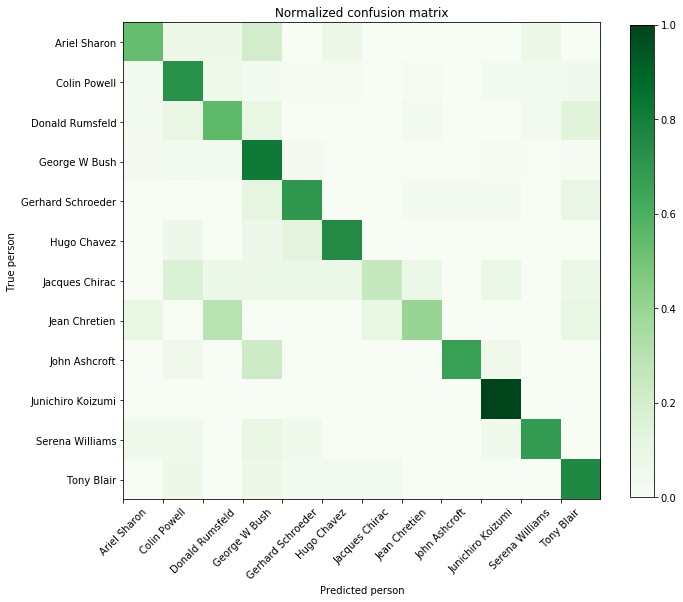

In [22]:
M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

### With normal Log Reg

In [23]:
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=10000)
clf.fit(X_train, y_train)
y_pred_full = clf.predict(X_test)

In [24]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred_full))

Accuracy: 0.792308


Accuracy is 79%  higher than 71%. So, in this case PCA didn't help much